In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('MasonWattsExpData.csv',low_memory=False)

In [40]:
expid_collective = df.copy()

num_labels = pd.get_dummies(expid_collective['collective'], dtype='int')
expid_collective = pd.concat([expid_collective,num_labels], axis=1)

In [41]:
expid_collective

,expid,graphid,node,trial,round,uid,probid,picid,guessX,guessY,...,mindist.X,mindist.Y,mindist.pts,mindist.dist,avg.dist,nbrs.same,collective,graphtype,Collective,Independent
0,1035,Max Avg Betweenness,1,6,1,72,1106,9,79,67,...,NaN,NaN,NaN,NaN,NaN,NaN,Collective,Structured,1,0
1,1035,Max Avg Betweenness,1,6,2,72,1106,9,80,67,...,50.0,29.0,25.11,48.414874,62.501593,0.0,Collective,Structured,1,0
2,1035,Max Avg Betweenness,1,6,3,72,1106,9,85,86,...,74.0,52.0,36.09,35.735137,40.478026,0.0,Collective,Structured,1,0
3,1035,Max Avg Betweenness,1,6,4,72,1106,9,86,86,...,72.0,50.0,45.81,38.626416,39.899142,0.0,Collective,Structured,1,0
4,1035,Max Avg Betweenness,1,6,5,72,1106,9,84,86,...,85.0,86.0,51.69,1.000000,3.000000,-1.0,Collective,Structured,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59090,2047,Independent,1,7,14,523,1201,16,41,65,...,NaN,NaN,NaN,NaN,NaN,NaN,Independent,Independent,0,1
59091,2047,Independent,1,7,12,523,1201,16,12,47,...,NaN,NaN,NaN,NaN,NaN,NaN,Independent,Independent,0,1
59092,2047,Independent,1,7,13,523,1201,16,38,46,...,NaN,NaN,NaN,NaN,NaN,NaN,Independent,Independent,0,1
59093,2039,Independent,1,6,15,29,1201,16,40,40,...,NaN,NaN,NaN,NaN,NaN,NaN,Independent,Independent,0,1


In [45]:
df.shape

(59095, 33)

In [42]:
len(expid_collective[(expid_collective['Collective']==1)])

53995

In [43]:
len(expid_collective[(expid_collective['Collective']==0)])

5100

In [44]:
# expid_collective = df[['expid','graphid','trial','collective']].drop_duplicates()

# num_labels = pd.get_dummies(expid_collective['collective'], dtype='int')
# expid_collective = pd.concat([expid_collective,num_labels], axis=1)

In [4]:
results = pd.read_csv('agg_results_50k.csv')

In [5]:
results.insert(2, '2', results['0'].astype(str) + '_' + results['1'].astype(str))
len(results['2'].unique())

573

In [6]:
len(results['ei'].unique())

50000

In [53]:
results.shape

(28650000, 8)

In [54]:
results.head(15)

,0,1,2,ei,memory,search_cost,tau,6
0,1035,1,1035_1,0.465077,27,0.194176,0.231178,-714.902057
1,1035,2,1035_2,0.029301,29,0.105818,0.904788,-810.739336
2,1035,3,1035_3,0.206187,36,0.320274,0.503673,-773.131482
3,1035,4,1035_4,0.322456,26,0.072667,0.604444,-759.525046
4,1035,5,1035_5,0.206187,36,0.320274,0.503673,-700.505786
5,1035,5,1035_5,0.253172,21,0.027804,0.960293,-754.409192
6,1035,5,1035_5,0.473318,11,0.320702,0.872544,-755.822060
7,1035,8,1035_8,0.045707,45,0.468114,0.294833,-585.871639
8,1036,2,1036_2,0.020007,13,0.050225,0.633092,-793.849784
9,1036,2,1036_2,0.045707,45,0.468114,0.294833,-778.314224


In [11]:
# Dataset,ExpId
trial_df = results.groupby(['0','ei','memory','search_cost','tau'])[['6']].max()
trial_df = trial_df.reset_index()
# trial_df.sort_values(by=['6'],ascending=False)

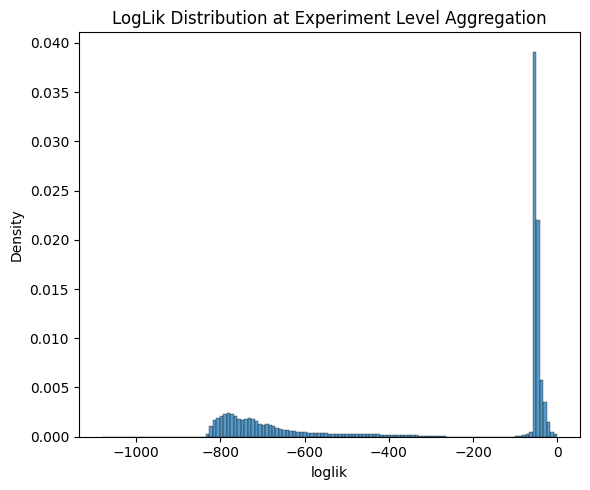

In [46]:
plt.figure(figsize=(6,5))

sns.histplot(trial_df['6'], stat='density')
plt.xlabel('loglik')

plt.title('LogLik Distribution at Experiment Level Aggregation')

plt.tight_layout()
plt.savefig('figures/LogLikDist_ExpLevel.png')
plt.show()

In [35]:
vars = ['ei','memory','search_cost','tau']
vals_geq150 = ['>= -150']
for var in vars:
    val = trial_df[trial_df['6'] >= -150][var].mean()
    print(f"Mean {var} is: {val}")
    vals_geq150.append(val)

vars = ['ei','memory','search_cost','tau']
vals_leq600 = ['<= -600']
for var in vars:
    val = trial_df[trial_df['6'] <= -600][var].mean()
    print(f"Mean {var} is: {val}")
    vals_leq600.append(val)

data = [vals_leq600, vals_geq150]
compare_groups_df = pd.DataFrame(data, columns=['Group','Curiosity','Memory','Search_Cost','Temperature(tau)'])
compare_groups_df

Mean ei is: 0.2497968638665297
Mean memory is: 25.5374
Mean search_cost is: 0.25052230899073097
Mean tau is: 0.5245449669279224


In [61]:
trial_df.shape

(3700000, 6)

In [74]:
bins = [-10000,-600,-150,0]
trial_df['Group_Label'] = pd.cut(trial_df['6'], bins=bins, labels=['<= -600','-600 < x < -150','>= -150'])

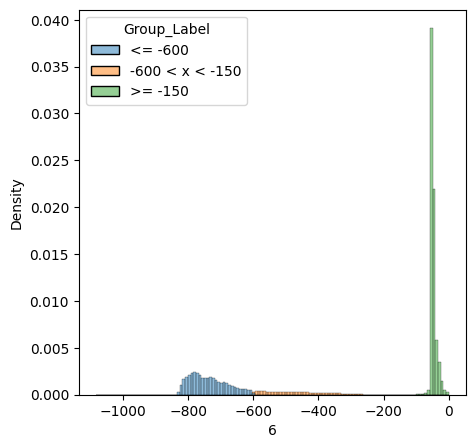

In [75]:
plt.figure(figsize=(5,5))
sns.histplot(data=trial_df, x='6', hue='Group_Label', stat='density')
plt.show()

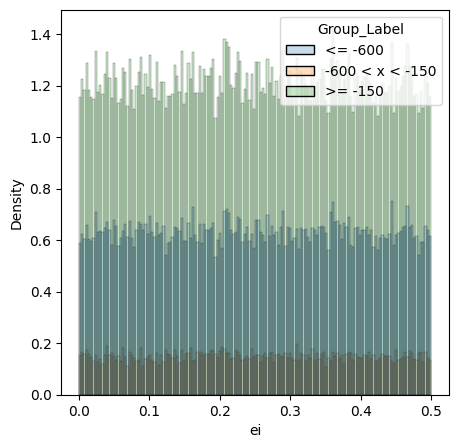

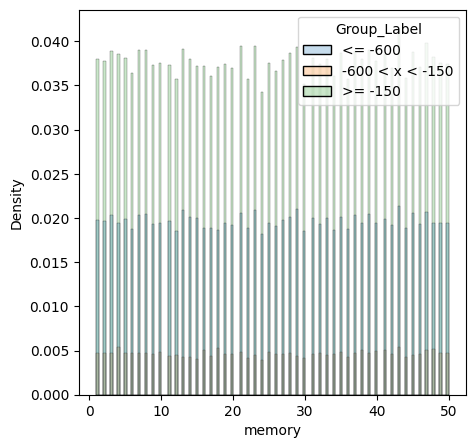

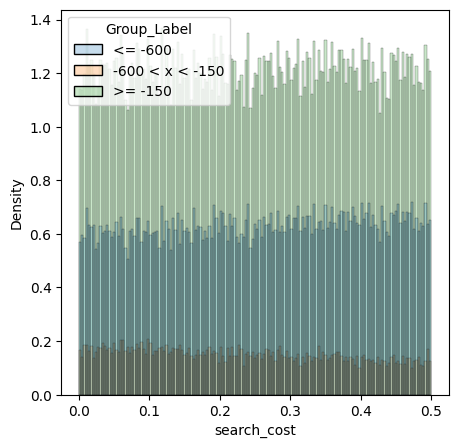

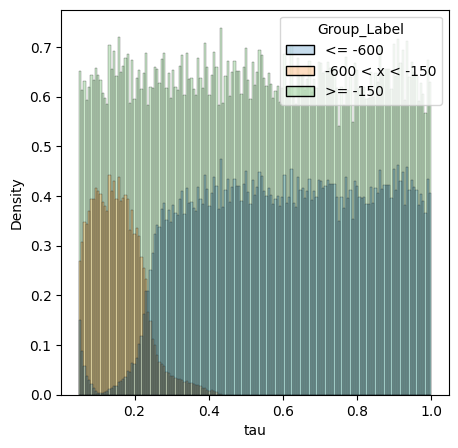

In [77]:
for var in vars:
    plt.figure(figsize=(5,5))
    sns.histplot(data=trial_df, x=f"{var}", hue='Group_Label', stat='density', alpha=0.25)
    plt.savefig(f"figures/grouphist_{var}_ExpLevel.png")
    plt.show()

In [51]:
# Dataset,ExpId
trial_df2 = results.groupby(['0','1','ei','memory','search_cost','tau'])[['6']].max()
trial_df2 = trial_df2.reset_index()
# trial_df.sort_values(by=['6'],ascending=False)

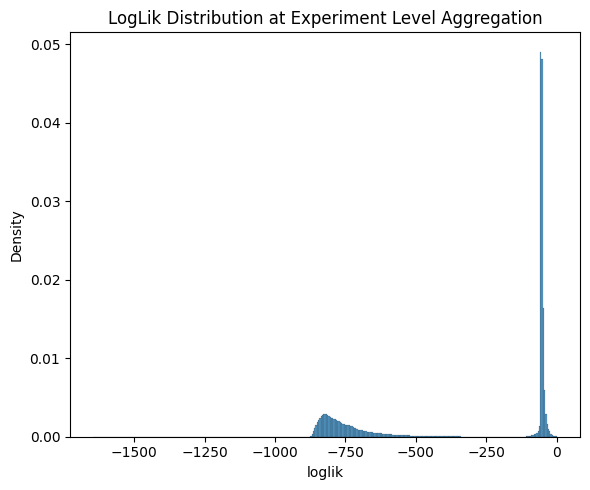

In [52]:
plt.figure(figsize=(6,5))

sns.histplot(trial_df2['6'], stat='density')
plt.xlabel('loglik')

plt.title('LogLik Distribution at Experiment Level Aggregation')

plt.tight_layout()
# plt.savefig('figures/LogLikDist_ExpLevel.png')
plt.show()